In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card/creditcard.csv


In [82]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, RobustScaler

In [84]:
#import the dataset using pandas
df = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')


In [85]:
Class = df['Class']
df.drop(['Class'], axis=1, inplace=True)
df.insert(0,'Class',Class)

Amount = df['Amount']
df.drop(['Amount'], axis=1, inplace=True)
df.insert(1,'Amount',Amount)

Fraud Count : 492
Non Fraud Count : 284315
Fraud Data :  0.17 % of dataset
Non Fraud Data :  99.83 % of dataset


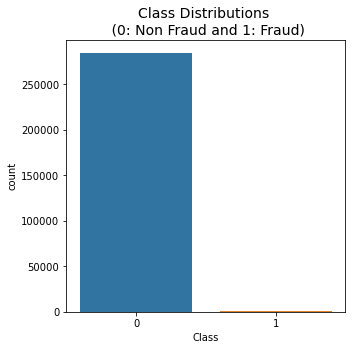

In [86]:
#determine number of fraud cases in dataset (plotting distribution of class)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print('Fraud Count :',len(fraud))
print('Non Fraud Count :',len(non_fraud))
print('Fraud Data : ',round(len(fraud)/len(df['Class'])*100,2),'% of dataset')
print('Non Fraud Data : ',round(len(non_fraud)/len(df['Class'])*100,2),'% of dataset')
plt.figure(figsize=(5,5))
plt.title('Class Distributions \n (0: Non Fraud and 1: Fraud)', fontsize=14)
figure = sns.countplot(x="Class", data=df)
plt.show()



In [87]:
#Description of dataset.
df.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,88.349619,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [88]:
#Description of Fraudulant Transaction.
fraud.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,1.0,122.211321,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667
std,0.0,256.683288,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,...,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291
min,1.0,0.000000,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,...,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290
25%,1.0,1.000000,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,...,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868
50%,1.0,9.250000,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,...,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344
75%,1.0,105.890000,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,...,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152
max,1.0,2125.870000,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,...,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364


In [89]:
#Description of Fraudulant Transaction.
non_fraud.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284315.0,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,0.0,88.291022,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,...,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
std,0.0,250.105092,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,...,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570
min,0.0,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,0.0,5.650000,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,...,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950
50%,0.0,22.000000,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,...,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199
75%,0.0,77.050000,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,...,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962
max,0.0,25691.160000,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,...,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


In [90]:
# Checking any missing values in data
df.isna().sum()

Class     0
Amount    0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
dtype: int64

In [91]:
# to shows no of columns and what are those columns
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

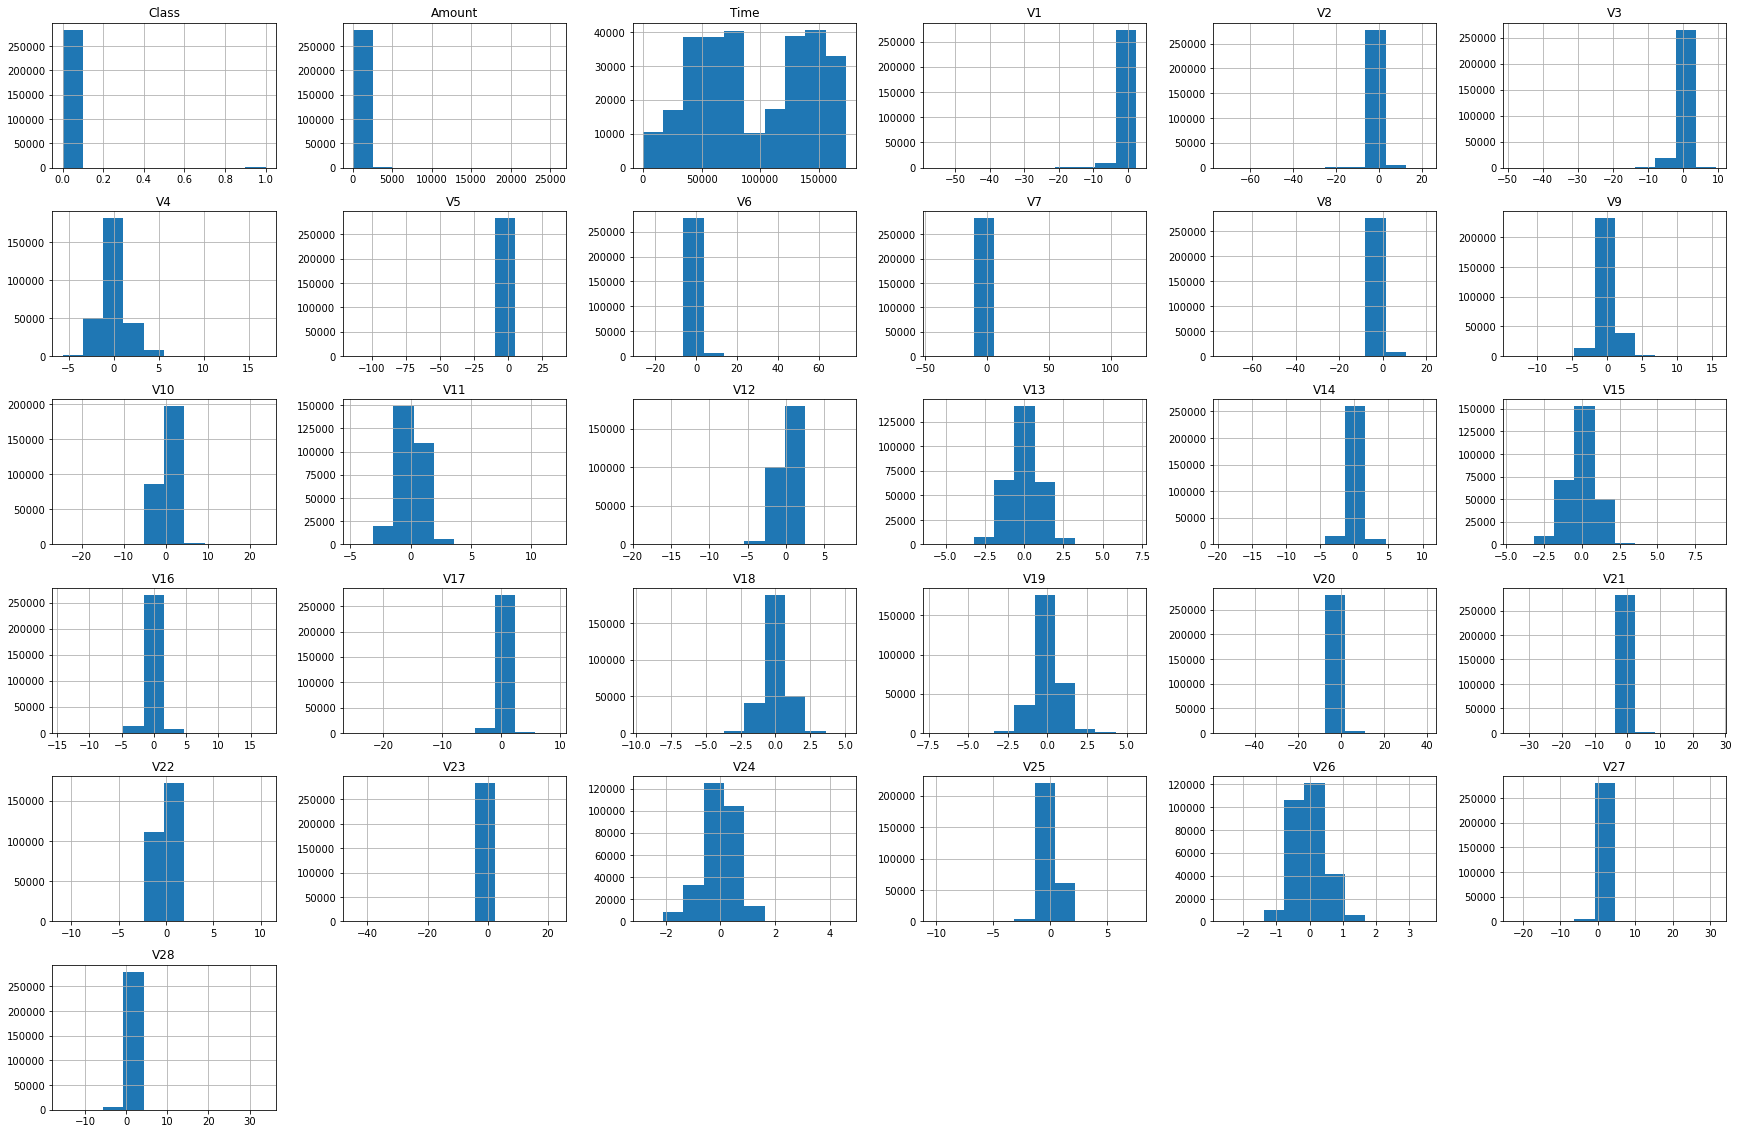

In [92]:
# plot Histogram of each parameter
df.hist(figsize=(30,20))
plt.show()

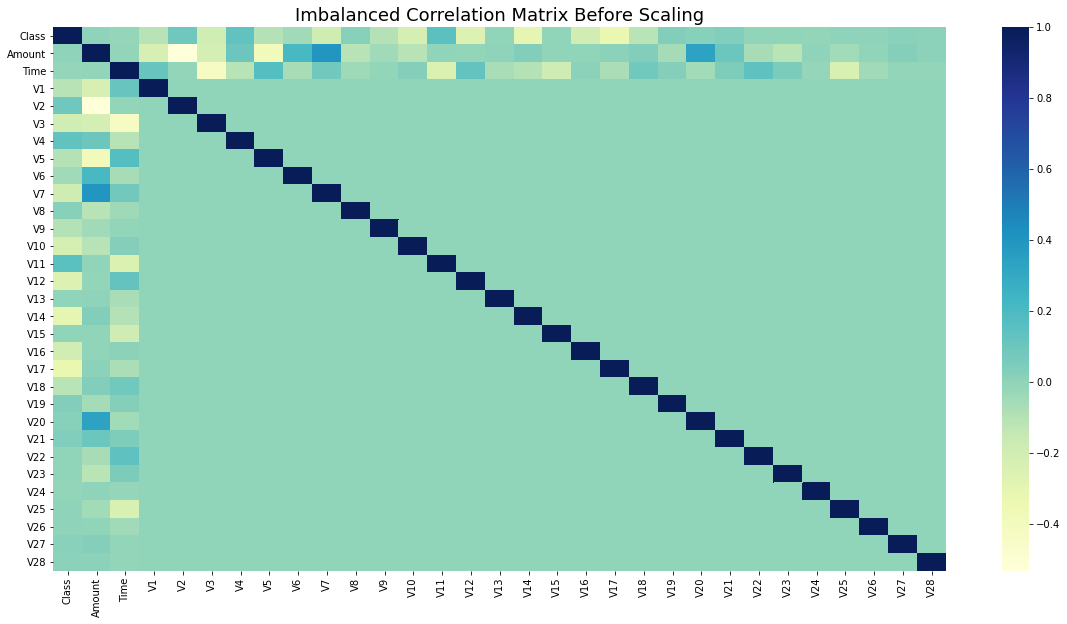

In [93]:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Imbalanced Correlation Matrix Before Scaling", fontsize=18)
plt.show()

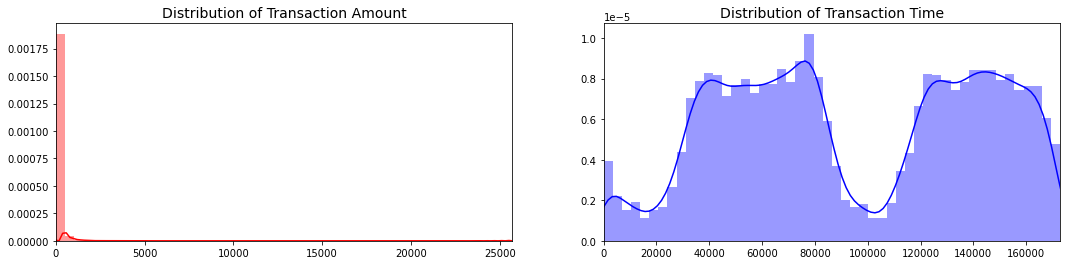

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [95]:
# scaling the unscaled Time and amount column
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

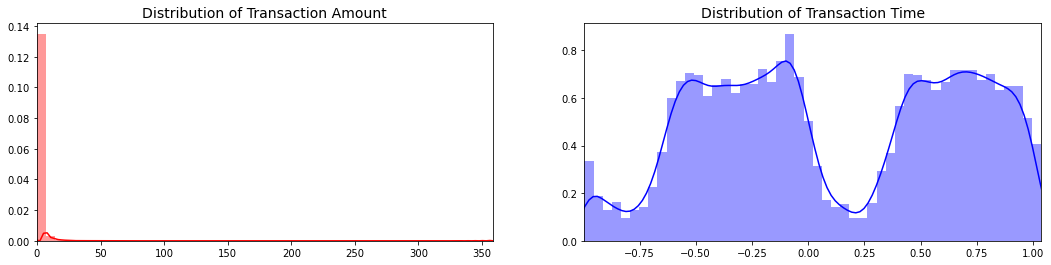

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['scaled_amount'].values
time_val = df['scaled_time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [97]:
scaled_time = df['scaled_time']
df.drop(['scaled_time'], axis=1, inplace=True)
df.insert(1,'scaled_time',scaled_time)

scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(1,'scaled_amount',scaled_amount)

In [98]:
# Dataset describtion after scaling of time and amount
df.describe()

,Class,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,0.041527,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,0.000000,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,0.000000,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,0.000000,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,0.000000,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,1.000000,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


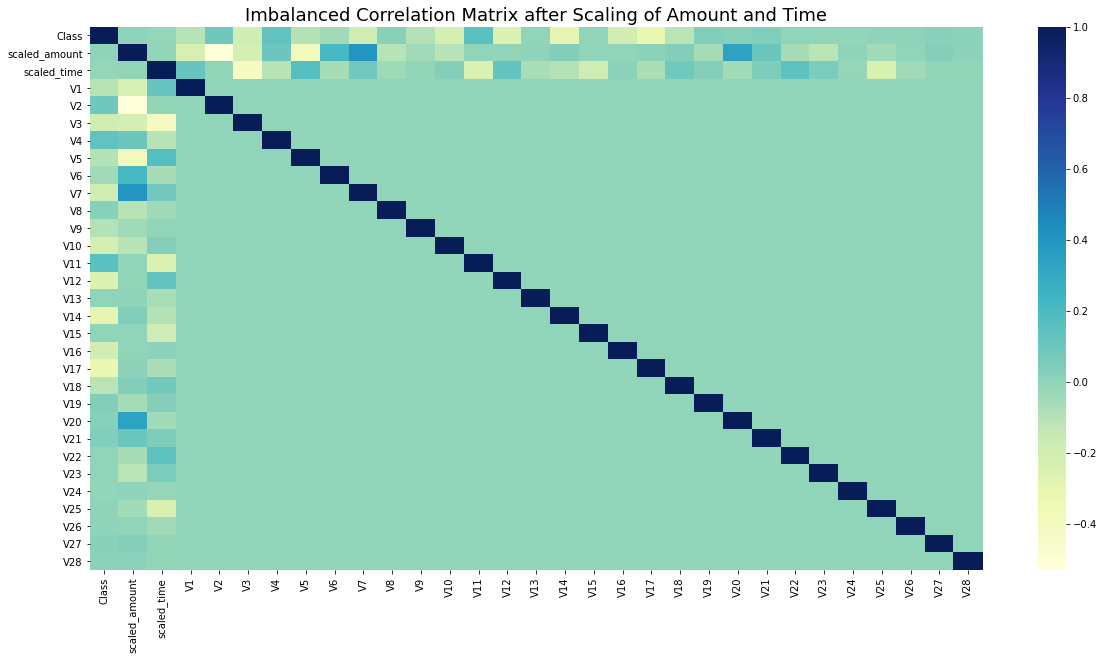

In [99]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Imbalanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

In [100]:
# Undersampling The Class Feature

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]

#Randomly select 492 observations from non fraud transaction 
non_fraud_df = df.loc[df['Class'] == 0].sample(n=492,random_state=42)
undersampled_normalized_df = pd.concat([fraud_df, non_fraud_df])

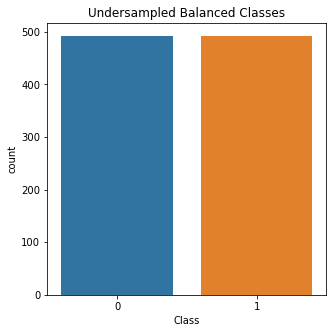

In [101]:
plt.figure(figsize=(5, 5))
sns.countplot('Class', data=undersampled_normalized_df)
plt.title('Undersampled Balanced Classes')
plt.show()

In [102]:
# Oversampling The Class Feature
from imblearn.over_sampling import SMOTE
# SMOTE is used to oversample minority datasample which looks like exactly minority class
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('Class', axis=1), df['Class'])
oversampled_train_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train_df.columns = undersampled_normalized_df.columns

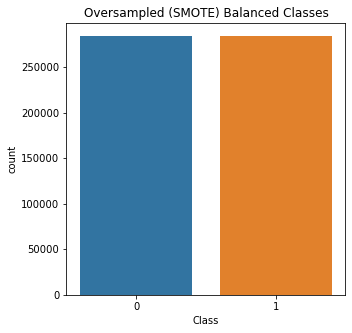

In [103]:
plt.figure(figsize=(5, 5))
sns.countplot('Class', data=oversampled_train_df)
plt.title('Oversampled (SMOTE) Balanced Classes')
plt.show()

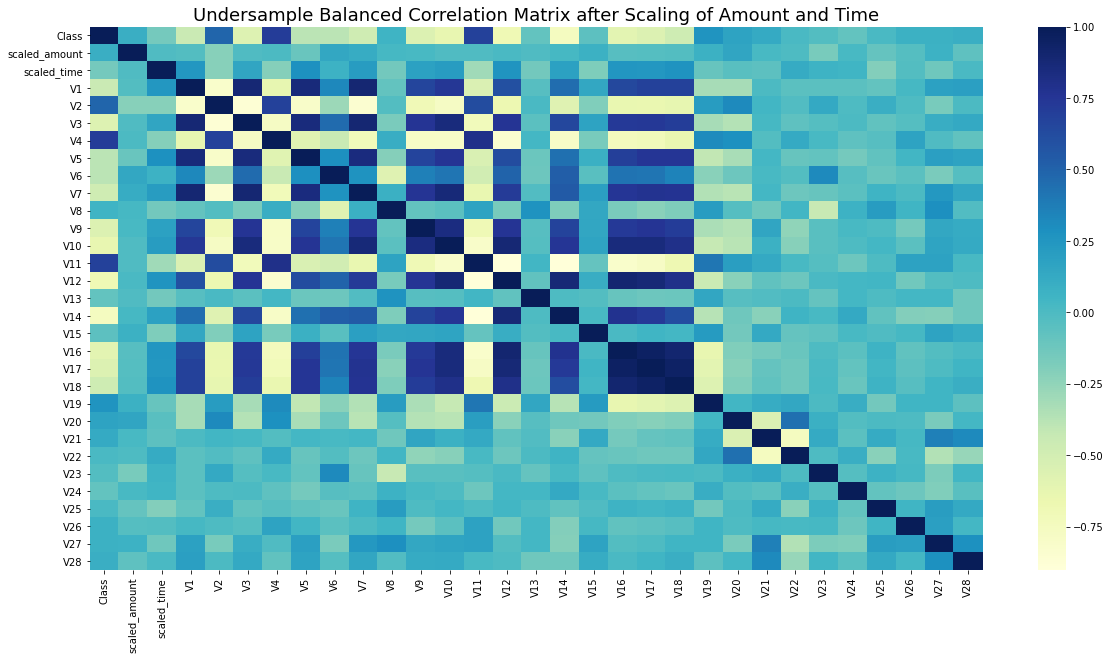

In [104]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = undersampled_normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Undersample Balanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

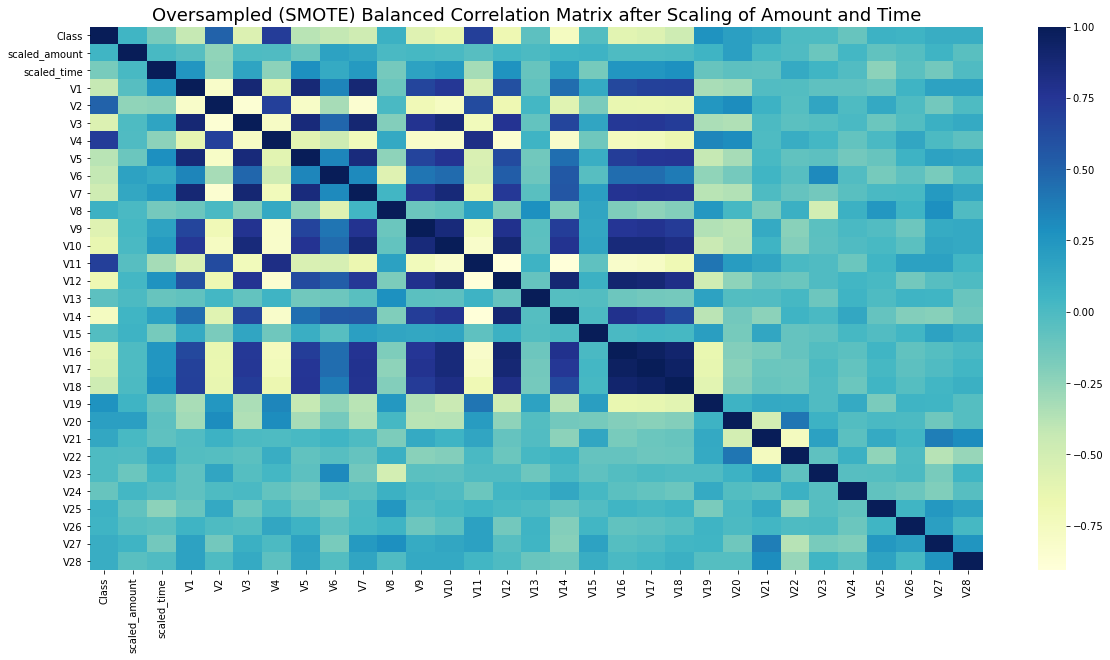

In [105]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train_df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Oversampled (SMOTE) Balanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

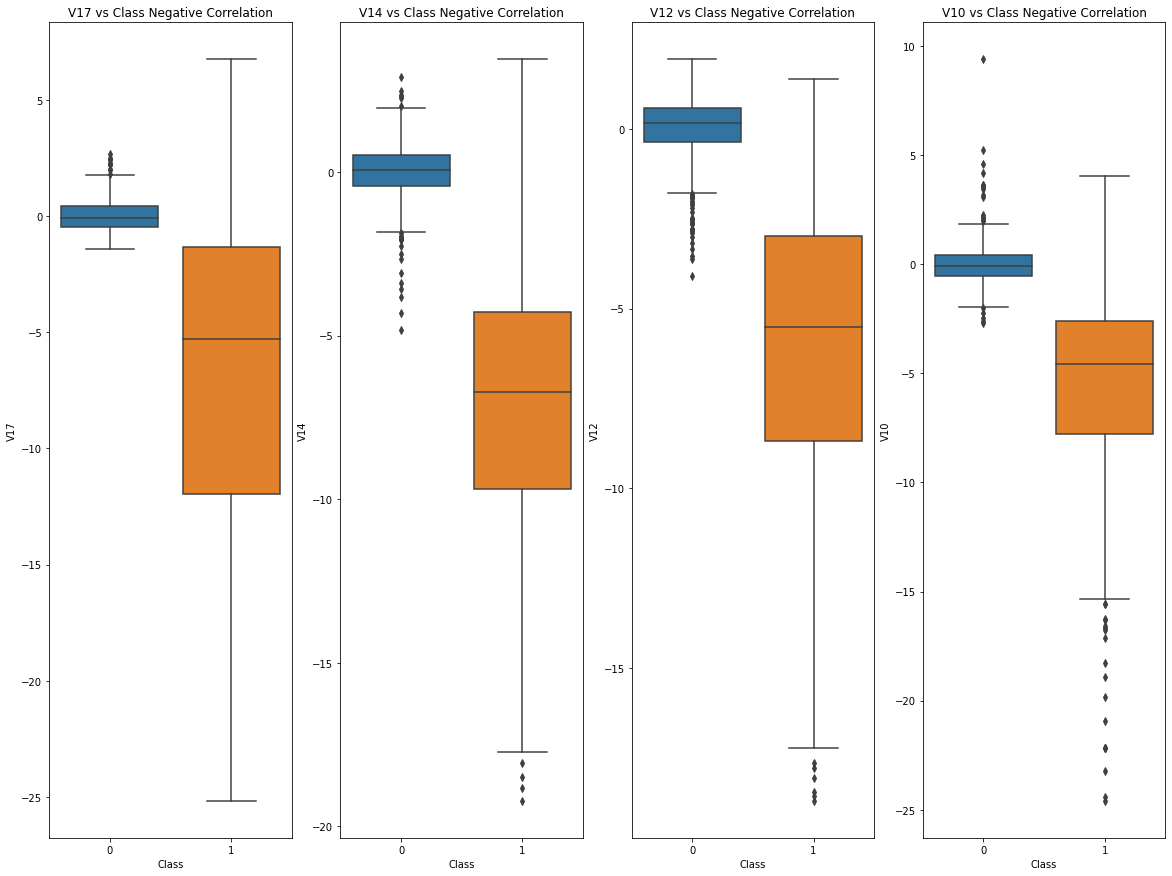

In [106]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

fig, axes = plt.subplots(ncols=4, figsize=(20,15))

sns.boxplot(x="Class", y="V17", data=undersampled_normalized_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=undersampled_normalized_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=undersampled_normalized_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [107]:
# Remove Outliers and re-plot the Boxplot
V14_non_fraud = undersampled_normalized_df.query('V14 > -4 & Class == 0')
V14_fraud = undersampled_normalized_df.query('Class == 1')
undersampled_normalized_df_no_outlier = pd.concat([V14_non_fraud,V14_fraud])


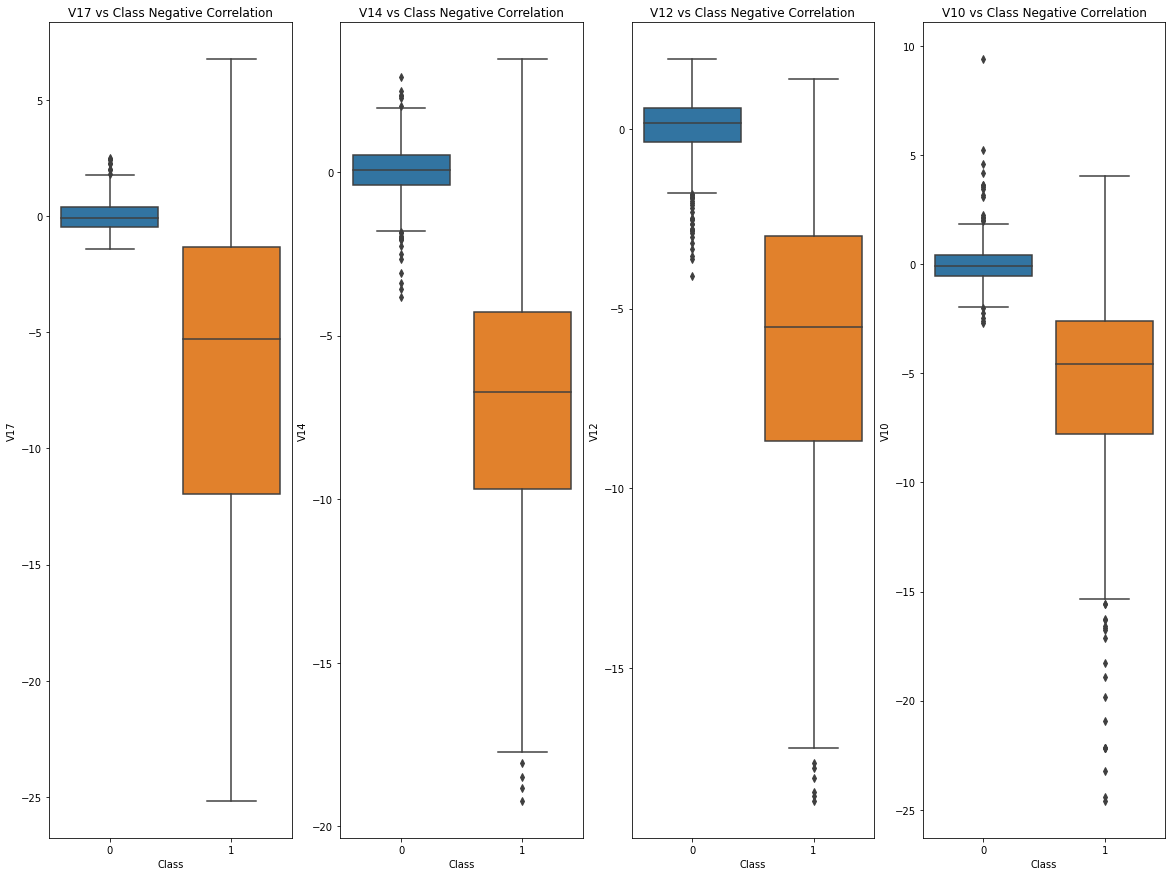

In [108]:
fig, axes = plt.subplots(ncols=4, figsize=(20,15))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=undersampled_normalized_df_no_outlier, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=undersampled_normalized_df_no_outlier, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=undersampled_normalized_df_no_outlier, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

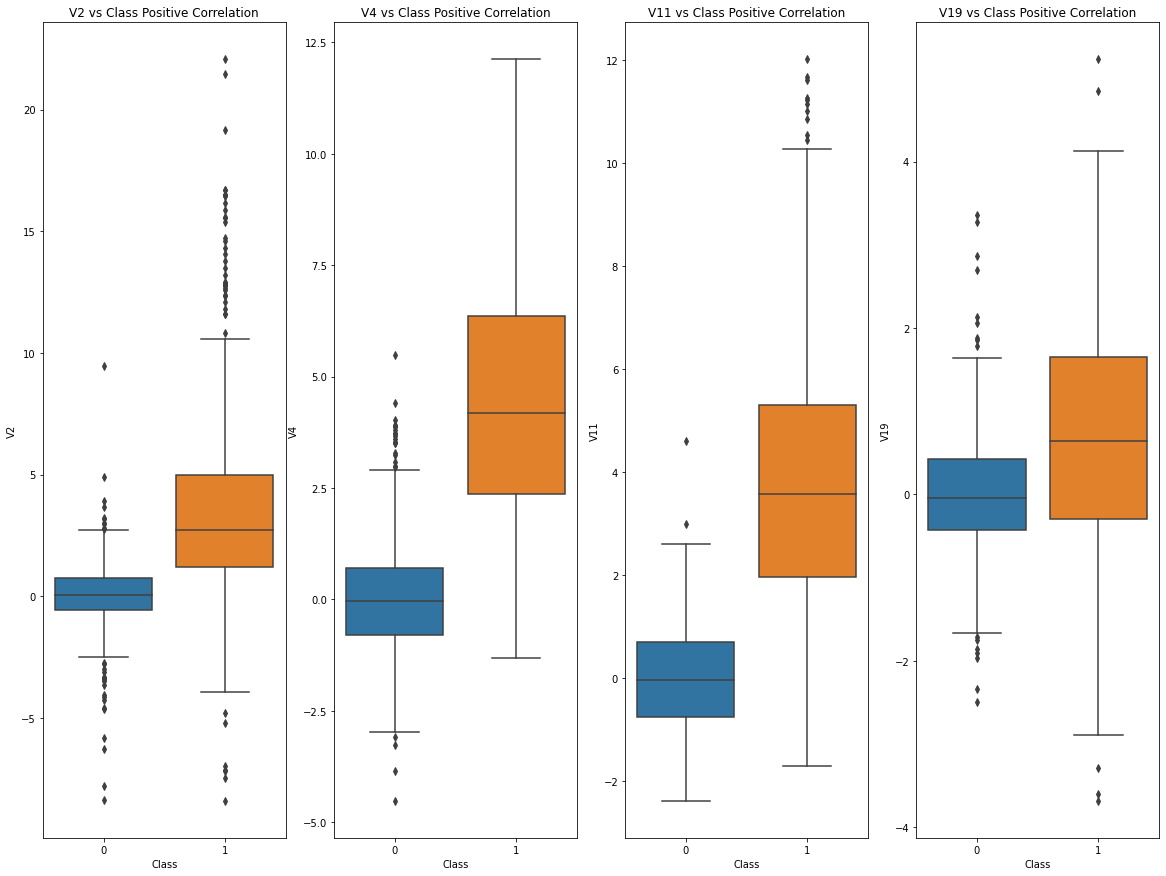

In [109]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V2", data=undersampled_normalized_df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=undersampled_normalized_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=undersampled_normalized_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [110]:
# Remove Outliers and re-plot the Boxplot
V2_non_fraud = undersampled_normalized_df.query('V2 < 8 & Class == 0')
V2_fraud = undersampled_normalized_df.query('Class == 1')
undersampled_normalized_df_no_outlier2 = pd.concat([V2_non_fraud,V2_fraud])


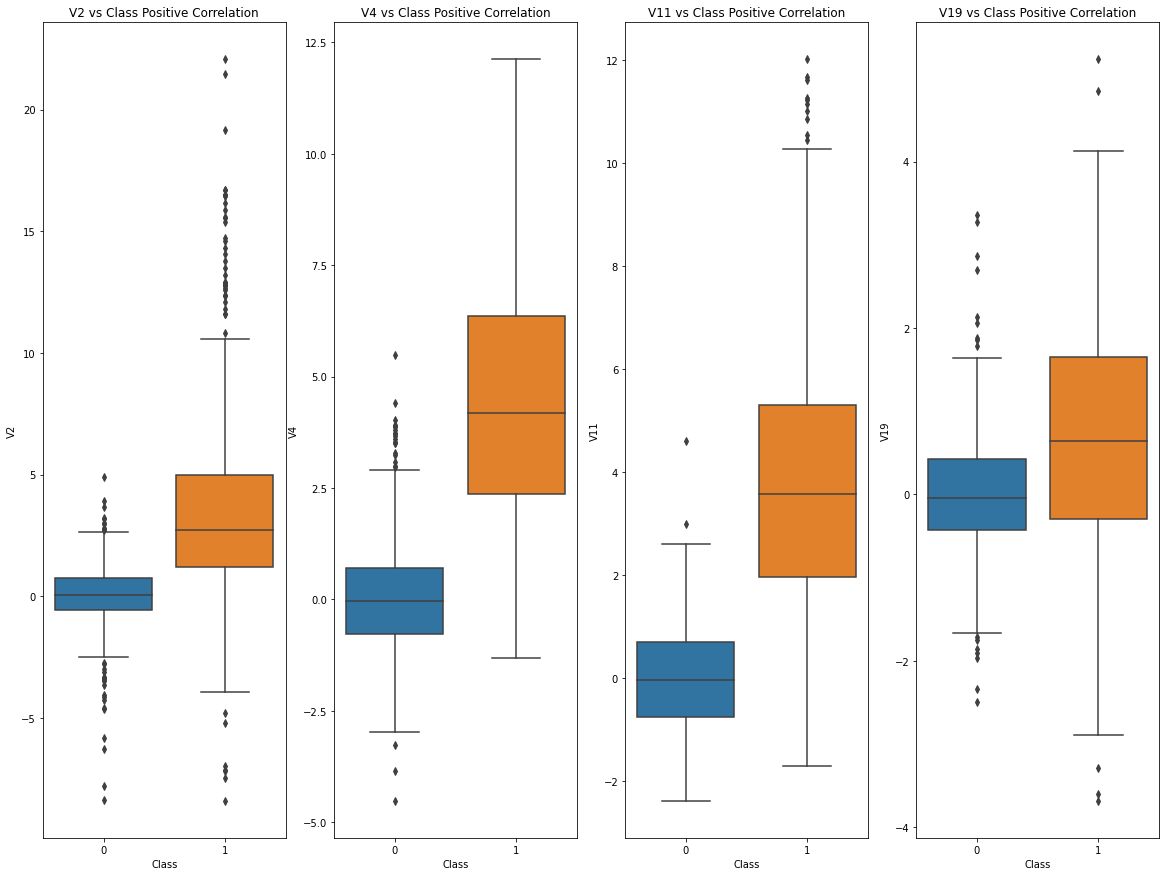

In [111]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V2", data=undersampled_normalized_df_no_outlier2, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=undersampled_normalized_df_no_outlier2, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=undersampled_normalized_df_no_outlier2, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=undersampled_normalized_df_no_outlier2, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [112]:
undersampled_normalized_df_no_outlier = undersampled_normalized_df_no_outlier2

In [ ]:
# Working on Undersampled dataset after outlier removal
X = undersampled_normalized_df_no_outlier.drop('Class', axis=1)
y = undersampled_normalized_df_no_outlier['Class']

In [113]:
# Working on Undersampled dataset
X = undersampled_normalized_df.drop('Class', axis=1)
y = undersampled_normalized_df['Class']

In [114]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X,y,test_size=0.2, random_state=42)

In [115]:
# Crate array for Traing and testting values for dataset
X_train_un = X_train_un.values 
X_test_un = X_test_un.values 
y_train_un = y_train_un.values 
y_test_un = y_test_un.values

In [ ]:
# Create dictionary of different classifier
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [116]:
# check Training score and accuracy score
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train_un, y_train_un)
    training_score_un = cross_val_score(classifier, X_train_un, y_train_un, cv=5)
    print("Classifiers:",classifier.__class__.__name__,"has a training score of", round(training_score_un.mean(),2)*100,"% accuracy")

Classifiers: LogisticRegression has a training score of 93.0 % accuracy
Classifiers: KNeighborsClassifier has a training score of 93.0 % accuracy
Classifiers: SVC has a training score of 93.0 % accuracy
Classifiers: DecisionTreeClassifier has a training score of 89.0 % accuracy


In [117]:
log_reg=LogisticRegression()
knears = KNeighborsClassifier()
svc=SVC()
tree_clf=DecisionTreeClassifier()
log_reg_score_un = cross_val_score(log_reg,X_train_un,y_train_un,cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score_un.mean()*100,2).astype(str)+'%')

knears_score_un = cross_val_score(knears,X_train_un,y_train_un,cv=5)
print('KNeighbors Cross Validation Score:', round(knears_score_un.mean()*100,2).astype(str)+'%')

svc_score_un = cross_val_score(svc,X_train_un,y_train_un,cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score_un.mean()*100,2).astype(str)+'%')

tree_score_un = cross_val_score(tree_clf,X_train_un,y_train_un,cv=5)
print('Decision Tree Classifier Cross Validation Score:', round(tree_score_un.mean()*100,2).astype(str)+'%')


Logistic Regression Cross Validation Score: 93.26%
KNeighbors Cross Validation Score: 93.14%
Support Vector Classifier Cross Validation Score: 92.88%
Decision Tree Classifier Cross Validation Score: 89.58%


In [118]:
# Using Cross validation score for predicting target variable and genearet ROC, AUC score
# ROC is probability curve
# AUC is represent degree of measure of separability. It tell how much model distingusing between two classes.
# If AUC is higher then model is better to predicting 0 as 0 and 1 as 1

from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import cross_val_predict

log_reg_pred_un = cross_val_predict(log_reg, X_train_un, y_train_un, cv=5, method="decision_function")

knears_pred_un = cross_val_predict(knears, X_train_un, y_train_un, cv=5)

svc_pred_un = cross_val_predict(svc,X_train_un, y_train_un, cv=5, method="decision_function")

tree_pred_un = cross_val_predict(tree_clf, X_train_un, y_train_un, cv=5)



In [119]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression with Cross Validation:', roc_auc_score(y_train_un,log_reg_pred_un))
print('KNears Neighbors with Cross Validation:', roc_auc_score(y_train_un,knears_pred_un))
print('Support Vector Classifier with Cross Validation:', roc_auc_score(y_train_un,svc_pred_un))
print('Decision Tree Classifier with Cross Validation:', roc_auc_score(y_train_un,tree_pred_un))

Logistic Regression with Cross Validation: 0.9699306389739218
KNears Neighbors with Cross Validation: 0.9313235427080508
Support Vector Classifier with Cross Validation: 0.9764211260510715
Decision Tree Classifier with Cross Validation: 0.8881892509784167


In [120]:
print('KNeighbors \n',classification_report(y_train_un,knears_pred_un))
#print(classification_report(y_train_un,svc_pred_un))
print('Decision Tree \n',classification_report(y_train_un,tree_pred_un))

KNeighbors 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       394
           1       0.98      0.88      0.93       393

    accuracy                           0.93       787
   macro avg       0.94      0.93      0.93       787
weighted avg       0.94      0.93      0.93       787

Decision Tree 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       394
           1       0.88      0.89      0.89       393

    accuracy                           0.89       787
   macro avg       0.89      0.89      0.89       787
weighted avg       0.89      0.89      0.89       787



In [121]:
# Training without Cross Validation
log_reg.fit(X_train_un, y_train_un)
knears.fit(X_train_un, y_train_un)
svc.fit(X_train_un, y_train_un)
tree_clf.fit(X_train_un, y_train_un)

DecisionTreeClassifier()

In [122]:
# Predict Model
reg_y_pred_un=log_reg.predict(X_test_un)
reg_accuracy_un=log_reg.score(X_test_un, y_test_un)
knears_y_pred_un=knears.predict(X_test_un)
knears_accuracy_un=knears.score(X_test_un, y_test_un)
svc_y_pred_un=knears.predict(X_test_un)
svc_accuracy_un=knears.score(X_test_un, y_test_un)
tree_y_pred_un=knears.predict(X_test_un)
tree_accuracy_un=knears.score(X_test_un, y_test_un)

In [123]:

from sklearn.metrics import confusion_matrix
reg_cm = confusion_matrix(y_test_un,reg_y_pred_un)
knears_cm = confusion_matrix(y_test_un,knears_y_pred_un)
svc_cm = confusion_matrix(y_test_un,svc_y_pred_un)
tree_cm = confusion_matrix(y_test_un,tree_y_pred_un)
print(reg_cm)
print(knears_cm)
print(svc_cm)
print(tree_cm)

[[98  0]
 [ 6 93]]
[[95  3]
 [11 88]]
[[95  3]
 [11 88]]
[[95  3]
 [11 88]]


In [124]:
print('Accuracy Score of Logistic Regression Model (without CV)',reg_accuracy_un*100,'%')
print('Accuracy Score of KNears Neighbors Model (without CV)',knears_accuracy_un*100,'%')
print('Accuracy Score of Support Vector Classifiers (without CV)',svc_accuracy_un*100,'%')
print('Accuracy Score of Decision Tree Classifiers (without CV)',tree_accuracy_un*100,'%')

Accuracy Score of Logistic Regression Model (without CV) 96.95431472081218 %
Accuracy Score of KNears Neighbors Model (without CV) 92.89340101522842 %
Accuracy Score of Support Vector Classifiers (without CV) 92.89340101522842 %
Accuracy Score of Decision Tree Classifiers (without CV) 92.89340101522842 %


In [125]:
print(" Comfusion Matrix Linear Regression")
Accuracy_Reg = ((reg_cm[0][0]+reg_cm[1][1])/reg_cm.sum())*100
print("Accuracy Decision:", Accuracy_Reg)
Error_rate_Reg = ((reg_cm[0][1]+reg_cm[1][0])/reg_cm.sum())*100
print("Error Rate Decision",Error_rate_Reg)
#True Fake Rate
Specificity_Reg = (reg_cm[1][1]/(reg_cm[1][1]+reg_cm[0][1]))*100
print("Specificity Decision:", Specificity_Reg)
# True Genuine Rate
Sensitivity_Reg = (reg_cm[0][0]/(reg_cm[0][0]+reg_cm[1][0]))*100
print("Sensitivity Decision",Sensitivity_Reg)

 Comfusion Matrix Linear Regression
Accuracy Decision: 96.95431472081218
Error Rate Decision 3.0456852791878175
Specificity Decision: 100.0
Sensitivity Decision 94.23076923076923


In [ ]:
from sklearn. metrics import 

In [126]:
# Working on Oversampled dataset
X = oversampled_train_df.drop('Class', axis=1)
y = oversampled_train_df['Class']

In [127]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X,y,test_size=0.2, random_state=42)

In [128]:
# Crate array for Traing and testting values for dataset
X_train_un = X_train_un.values 
X_test_un = X_test_un.values 
y_train_un = y_train_un.values 
y_test_un = y_test_un.values

In [ ]:
# Create dictionary of different classifier
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# check Training score and accuracy score
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train_un, y_train_un)
    training_score_un = cross_val_score(classifier, X_train_un, y_train_un, cv=5)
    print("Classifiers:",classifier.__class__.__name__,"has a training score of", round(training_score_un.mean(),2)*100,"% accuracy")

In [ ]:
log_reg=LogisticRegression()
knears = KNeighborsClassifier()
svc=SVC()
tree_clf=DecisionTreeClassifier()
log_reg_score_un = cross_val_score(log_reg,X_train_un,y_train_un,cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score_un.mean()*100,2).astype(str)+'%')

knears_score_un = cross_val_score(knears,X_train_un,y_train_un,cv=5)
print('KNeighbors Cross Validation Score:', round(knears_score_un.mean()*100,2).astype(str)+'%')

svc_score_un = cross_val_score(svc,X_train_un,y_train_un,cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score_un.mean()*100,2).astype(str)+'%')

tree_score_un = cross_val_score(tree_clf,X_train_un,y_train_un,cv=5)
print('Decision Tree Classifier Cross Validation Score:', round(tree_score_un.mean()*100,2).astype(str)+'%')

In [ ]:
# Using Cross validation score for predicting target variable and genearet ROC, AUC score
# ROC is probability curve
# AUC is represent degree of measure of separability. It tell how much model distingusing between two classes.
# If AUC is higher then model is better to predicting 0 as 0 and 1 as 1

from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import cross_val_predict

log_reg_pred_un = cross_val_predict(log_reg, X_train_un, y_train_un, cv=5, method="decision_function")

knears_pred_un = cross_val_predict(knears, X_train_un, y_train_un, cv=5)

svc_pred_un = cross_val_predict(svc,X_train_un, y_train_un, cv=5, method="decision_function")

tree_pred_un = cross_val_predict(tree_clf, X_train_un, y_train_un, cv=5)


In [ ]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression with Cross Validation:', roc_auc_score(y_train_un,log_reg_pred_un))
print('KNears Neighbors with Cross Validation:', roc_auc_score(y_train_un,knears_pred_un))
print('Support Vector Classifier with Cross Validation:', roc_auc_score(y_train_un,svc_pred_un))
print('Decision Tree Classifier with Cross Validation:', roc_auc_score(y_train_un,tree_pred_un))

In [ ]:
print('KNeighbors \n',classification_report(y_train_un,knears_pred_un))
#print(classification_report(y_train_un,svc_pred_un))
print('Decision Tree \n',classification_report(y_train_un,tree_pred_un))

In [ ]:
# Training without Cross Validation
log_reg.fit(X_train_un, y_train_un)
knears.fit(X_train_un, y_train_un)
svc.fit(X_train_un, y_train_un)
tree_clf.fit(X_train_un, y_train_un)

In [ ]:
# Predict Model
reg_y_pred_un=log_reg.predict(X_test_un)
reg_accuracy_un=log_reg.score(X_test_un, y_test_un)
knears_y_pred_un=knears.predict(X_test_un)
knears_accuracy_un=knears.score(X_test_un, y_test_un)
svc_y_pred_un=knears.predict(X_test_un)
svc_accuracy_un=knears.score(X_test_un, y_test_un)
tree_y_pred_un=knears.predict(X_test_un)
tree_accuracy_un=knears.score(X_test_un, y_test_un)

In [ ]:
from sklearn.metrics import confusion_matrix
reg_cm = confusion_matrix(y_test_un,reg_y_pred_un)
knears_cm = confusion_matrix(y_test_un,knears_y_pred_un)
svc_cm = confusion_matrix(y_test_un,svc_y_pred_un)
tree_cm = confusion_matrix(y_test_un,tree_y_pred_un)
print(reg_cm)
print(knears_cm)
print(svc_cm)
print(tree_cm)

In [ ]:
print('Accuracy Score of Logistic Regression Model (without CV)',reg_accuracy_un*100,'%')
print('Accuracy Score of KNears Neighbors Model (without CV)',knears_accuracy_un*100,'%')
print('Accuracy Score of Support Vector Classifiers (without CV)',svc_accuracy_un*100,'%')
print('Accuracy Score of Decision Tree Classifiers (without CV)',tree_accuracy_un*100,'%')

In [ ]:
print(" Comfusion Matrix Linear Regression")
Accuracy_Reg = ((reg_cm[0][0]+reg_cm[1][1])/reg_cm.sum())*100
print("Accuracy Decision:", Accuracy_Reg)
Error_rate_Reg = ((reg_cm[0][1]+reg_cm[1][0])/reg_cm.sum())*100
print("Error Rate Decision",Error_rate_Reg)
#True Fake Rate
Specificity_Reg = (reg_cm[1][1]/(reg_cm[1][1]+reg_cm[0][1]))*100
print("Specificity Decision:", Specificity_Reg)
# True Genuine Rate
Sensitivity_Reg = (reg_cm[0][0]/(reg_cm[0][0]+reg_cm[1][0]))*100
print("Sensitivity Decision",Sensitivity_Reg)

In [ ]:
# Here we are splitting our dataset into Inliers(Non_Fraud) and Outliers(Fraud) cases, We are also dropping 'Class' column from out dataset for unsupervised learining.
inliers = df[df.Class==0]
inliers = inliers.drop(['Class'], axis=1)
outliers = df[df.Class==1]
outlier_class=outliers['Class']
outliers = outliers.drop(['Class'], axis=1)

In [ ]:
# the predictions of LOF and Isolation forest is -1(fraud) and 1(non-fraud).
#changing this to the format used in given dataset(0 for non fraud and 1 for fraud)
def reformat(y):
    y[y==1]= 0
    y[y == -1] = 1
    return y

In [ ]:
# Using non-fraud cases to train using Isolation Forest. testing and further applying the model on fraud cases.
inliers_train, inliers_test = train_test_split(inliers, test_size=0.30)
print('Normal Inliner Train count :',len(inliers_train))
print('Normal Inliner Test count :',len(inliers_test))

In [ ]:
model1 = IsolationForest()
model1.fit(inliers_train)



In [ ]:
pred_test_IF = model1.predict(inliers_test)
pred_test_IF = reformat(pred_test_IF)
outlier_pred_IF = model1.predict(outliers)

outlier_pred_IF = reformat(outlier_pred_IF)

In [ ]:
# Using non-fraud cases to train using LOF. Testing and further applying the model on fraud cases.

model2 = LocalOutlierFactor(novelty=True)
model2.fit(inliers_train)


In [ ]:
pred_test_LOF = model2.predict(inliers_test)
pred_test_LOF = reformat(pred_test_LOF)
outlier_pred_LOF = model2.predict(outliers)
outlier_pred_LOF = reformat(outlier_pred_LOF)

In [ ]:
# printing the accuracy score and the classification reporabst
print('Isolation forest(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_IF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_IF, zero_division=0)))
print('LocalOutlierFactor(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_LOF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_LOF, zero_division =0)))


In [ ]:
import keras
import tensorflow
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
np.random.seed(42)

In [ ]:
class AutoEncoder:
    def __init__(self,x):
        
        self.x = x
        

    def concat(self):
        model = Sequential()
        model.add(Dense(100, input_dim=self.x.shape[1], activation='relu'))
        #model.add(Dense(10, activation='relu')) 
        model.add(Dense(10,activation = 'relu')) # size to compress to
        #model.add(Dense(10, activation='relu'))
        model.add(Dense(100, activation='relu'))
        model.add(Dense(self.x.shape[1])) # Multiple output neurons
        
        self.model = model
        return model

    def fit(self, epochs=30):
        self.model.compile(Adam(lr=0.00005), loss='mse')
        self.model.fit(self.x, self.x,
                        epochs=epochs,
                        verbose=2,
                        batch_size=1000)
        return model
    def predict(self,y):
        model.predict(y)
        return model


In [ ]:
if __name__ == '__main__':
    ae = AutoEncoder(inliers_train.values)
    #ae.concat()
    #ae.fit(epochs=150)

In [ ]:
con = ae.concat()
type(con)

In [ ]:
ae.fit(epochs=150)

In [ ]:
predictions = ae.predict(inliers_test)

In [ ]:
model = keras.Sequential()
model.add(Dense(100, input_dim=inliers_train.shape[1], activation='relu'))
        #model.add(Dense(10, activation='relu')) 
model.add(Dense(10,activation = 'relu')) # size to compress to
        #model.add(Dense(10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(inliers_train.shape[1])) # Multiple output neurons
        
model.compile(Adam(lr=0.00005), loss='mse')
model.fit(inliers_train, inliers_train,
                        epochs=30,
                        verbose=2,
                        batch_size=1000)
    
predictions = model.predict(inliers_test)
        

In [ ]:
predictions.shape

In [ ]:
mse = np.sum(np.power(inliers_test - predictions, 2), axis=1)

In [ ]:
mse

In [ ]:
pred = model.predict(inliers_test)
score1 = np.mean(np.power(inliers_test - pred, 2), axis=1)
#score1 = np.sqrt(metrics.mean_squared_error(pred,inliers_test))
pred = model.predict(inliers)
#score2 = np.sqrt(metrics.mean_squared_error(pred,inliers))
score2 = np.mean(np.power(inliers - pred, 2), axis=1)
pred = model.predict(outliers)
#score3 = np.sqrt(metrics.mean_squared_error(pred,outliers))
score3 = np.mean(np.power(outliers - pred, 2), axis=1)
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Attack Underway Score (RMSE): {score3}")